In [ ]:
# import libraries
from random import random
from random import randint
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-6d080c5bd7d4>:16: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
#def load_dataset():
df = pd.read_csv('albrecht.csv',  header=0)
df.head()
#COL_LIST = ["Language"]
#df1 = df.drop(COL_LIST,axis=1)
#df.columns()
data = df.values
X, y = data[:, :-1], data[:, -1]

In [ ]:
df.head(10)

,Input,Output,Inquiry,File,FPAdj,RawFPcounts,AdjFP,Effort
0,25,150,75,60,1.00,1750.00,1750,102.4
1,193,98,70,36,1.00,1902.00,1902,105.2
2,70,27,0,12,0.80,535.00,428,11.1
3,40,60,20,12,1.15,660.00,759,21.1
4,10,69,1,9,0.90,478.89,431,28.8
5,13,19,0,23,0.75,377.33,283,10.0
6,34,14,0,5,0.80,256.25,205,8.0
7,17,17,15,5,1.10,262.73,289,4.9
8,45,64,14,16,0.95,715.79,680,12.9
9,40,60,20,15,1.15,690.43,794,19.0


In [ ]:
df.corr()

,Input,Output,Inquiry,File,FPAdj,RawFPcounts,AdjFP,Effort
Input,1.000000,0.437365,0.518808,0.329908,0.104715,0.697841,0.670758,0.628075
Output,0.437365,1.000000,0.678474,0.734455,0.342765,0.898834,0.906449,0.876030
Inquiry,0.518808,0.678474,1.000000,0.578112,0.286527,0.801837,0.776521,0.840994
File,0.329908,0.734455,0.578112,1.000000,0.152240,0.834685,0.822755,0.761471
FPAdj,0.104715,0.342765,0.286527,0.152240,1.000000,0.268481,0.406855,0.234605
RawFPcounts,0.697841,0.898834,0.801837,0.834685,0.268481,1.000000,0.985709,0.949967
AdjFP,0.670758,0.906449,0.776521,0.822755,0.406855,0.985709,1.000000,0.935014
Effort,0.628075,0.876030,0.840994,0.761471,0.234605,0.949967,0.935014,1.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

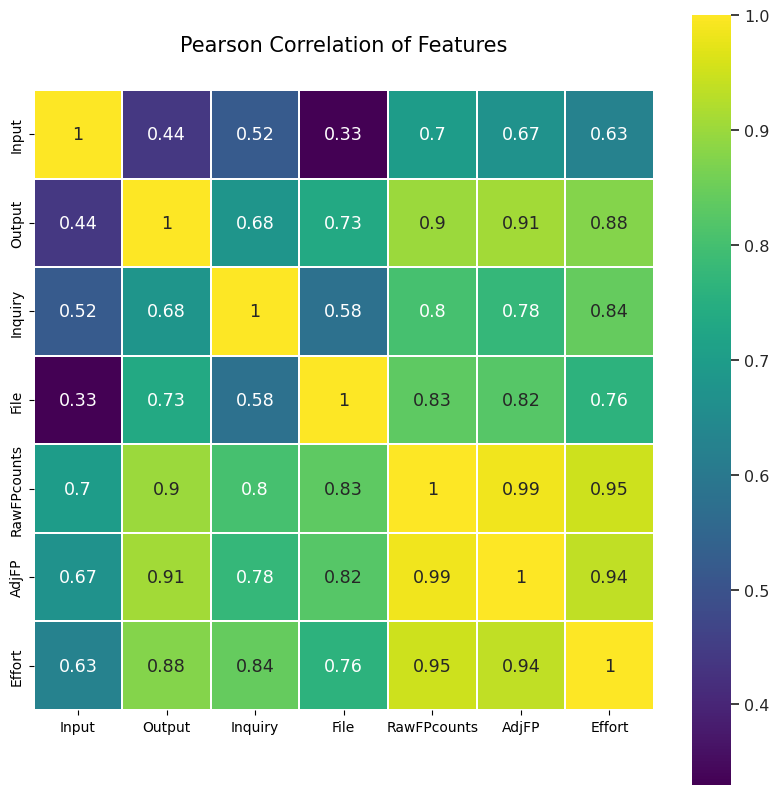

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df.drop(['FPAdj'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, annot=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def load_dataset():
#preprocessing
 features = [ 'Input',	'Output',	'Inquiry',	'File', 'FPAdj',	'RawFPcounts',	'AdjFP']
 max_corr_features = ['Input',	'Output',	'Inquiry',	'File',	'RawFPcounts',	'AdjFP']

 X = df[max_corr_features]
 y = df['Effort']

# normalize the target
 scaler = MinMaxScaler()
 y = y.values.reshape((len(y), 1))
 y = scaler.fit_transform(y)
 return X, y

In [ ]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
	return mean_absolute_error(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
	return [random() for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
	# copy current solution
	updated = current.copy()
	for i in range(n_changes):
		# select a point to change
		ix = randint(0, len(updated)-1)
		# flip the class label
		updated[ix] = random()
	return updated

# run a hill climb for a set of predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
def hill_climb_testset(X_test, y_test, max_iterations):
	scores = list()
	# generate the initial solution
	solution = random_predictions(X_test.shape[0])
	# evaluate the initial solution
	score = evaluate_predictions(y_test, solution)
	print('>%.3f' % score)
	# hill climb to a solution
	for i in range(max_iterations):
		# record scores
		scores.append(score)
		# stop once we achieve the best score
		if score == 0.0:
			break
		# generate new candidate
		candidate = modify_predictions(solution)
		# evaluate candidate
		value = evaluate_predictions(y_test, candidate)
		# check if it is as good or better
		if value <= score:
			solution, score = candidate, value
			print('>%d, score=%.3f' % (i, score))
	return solution, scores

(24, 6) (24, 1)
(16, 6) (8, 6) (16, 1) (8, 1)
>0.536
>0, score=0.456
>4, score=0.371
>5, score=0.333
>9, score=0.327
>15, score=0.293
>16, score=0.280
>18, score=0.264
>21, score=0.255
>22, score=0.244
>23, score=0.198
>24, score=0.157
>27, score=0.150
>28, score=0.138
>33, score=0.121
>37, score=0.119
>48, score=0.111
>55, score=0.107
>56, score=0.082
>63, score=0.063
>78, score=0.057
>85, score=0.045
>86, score=0.040
>88, score=0.038
>100, score=0.031
>104, score=0.023
>140, score=0.021
>143, score=0.014
>161, score=0.013
>287, score=0.012
>300, score=0.012
>343, score=0.009
>368, score=0.008
>404, score=0.008
>526, score=0.007
>637, score=0.006
>708, score=0.005
>803, score=0.004
>843, score=0.004
>1166, score=0.004
>1289, score=0.004
>1302, score=0.003
>1471, score=0.003
>1622, score=0.003
>1671, score=0.003
>1852, score=0.003
>1932, score=0.002
>1974, score=0.002
>2049, score=0.002
>2433, score=0.002
>2527, score=0.002
>2621, score=0.002
>2866, score=0.001
>3799, score=0.001
>4271

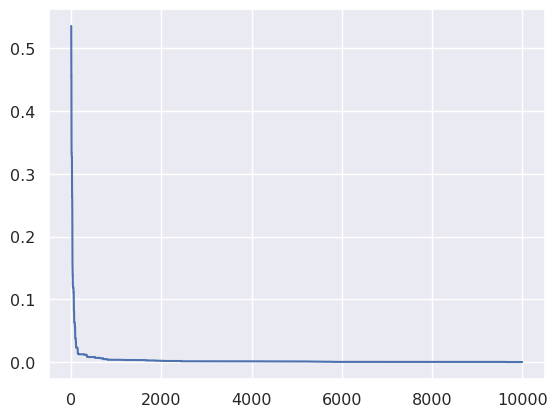

Mean Magnitude of Relative Error: 0.041155115526289934
Median Magnitude of Relative Error: 0.029090548015085066
R squared :  99.99775255426358
Mean square error:  2.7345415670634035e-05
Root mean square error:  0.05229284431988189
Mean magnitude of percentage error : 0.44821247744889003


In [ ]:
# load the dataset
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
X, y = load_dataset()
print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 10000)
# plot the scores vs iterations
pyplot.plot(scores)
pyplot.show()
#print('Test Accuracy: %.5f' % (scores))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,yhat) * 100
relative_error = np.abs((y_test - yhat) / y_test)
mean_relative_error = mean_absolute_error(y_test, yhat)
median_relative_error = median_absolute_error(y_test, yhat)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,yhat) * 100)
print("Mean square error: ", mean_squared_error(y_test, yhat) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, yhat)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, yhat) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, yhat) * 100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
pyplot.show()
#print(neigh.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 5.280961477236549
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  56.45639031938452
Mean square error:  0.5298095020606878
Root mean square error:  7.278801426475981
Mean magnitude of percentage error : 54.08407824823045


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
#print(regressor.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 13.07373823827072
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  -123.93988055815046
Mean square error:  2.7247506001520483
Root mean square error:  16.506818591576174
Mean magnitude of percentage error : 130.99910987478188


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
for i in np.arange(100,1100,100):
    regressor1 = RandomForestRegressor(n_estimators=i,max_features=5)
    regressor1.fit(X_train, y_train)
    predict = regressor1.predict(X_test)
    #print(regressor1.score(X_test, y_test))
    relative_error = np.abs((y_test - predict) / y_test)
    mean_relative_error = mean_absolute_error(y_test, predict)
    median_relative_error = median_absolute_error(y_test, predict)
    #print("Relative Error:", relative_error)
    print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
    print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
    print("R squared : " ,r2_score(y_test,predict) * 100)
    print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
    print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
    #print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
    print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 7.3794173829990495
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  24.86278631909913
Mean square error:  0.9142193322623705
Root mean square error:  9.561481748465404
Mean magnitude of percentage error : 77.66786422886707
Mean Magnitude of Relative Error: 7.91248806112704
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  21.015016096004235
Mean square error:  0.9610364253075843
Root mean square error:  9.80324653014288
Mean magnitude of percentage error : 83.8838917343605
Mean Magnitude of Relative Error: 7.599848774275694
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  22.225099509909285
Mean square error:  0.9463129401469514
Root mean square error:  9.727861739081984
Mean magnitude of percentage error : 76.9562907965741
Mean Magnitude of Relative Error: 7.554978510028641
Median Magnitude of Relative Error: 0.051313025437042456
R squared :  25.206877656309768
Mean square error:  0.9100326

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
predict = LinearSVC.predict(X_test)
#print(LinearSVC.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 19.47702134496528
Median Magnitude of Relative Error: 14.264069299072208
R squared :  28.07665010119582
Mean square error:  9.79616261361044
Root mean square error:  31.298822044304544
Mean magnitude of percentage error : 87.36267780614091


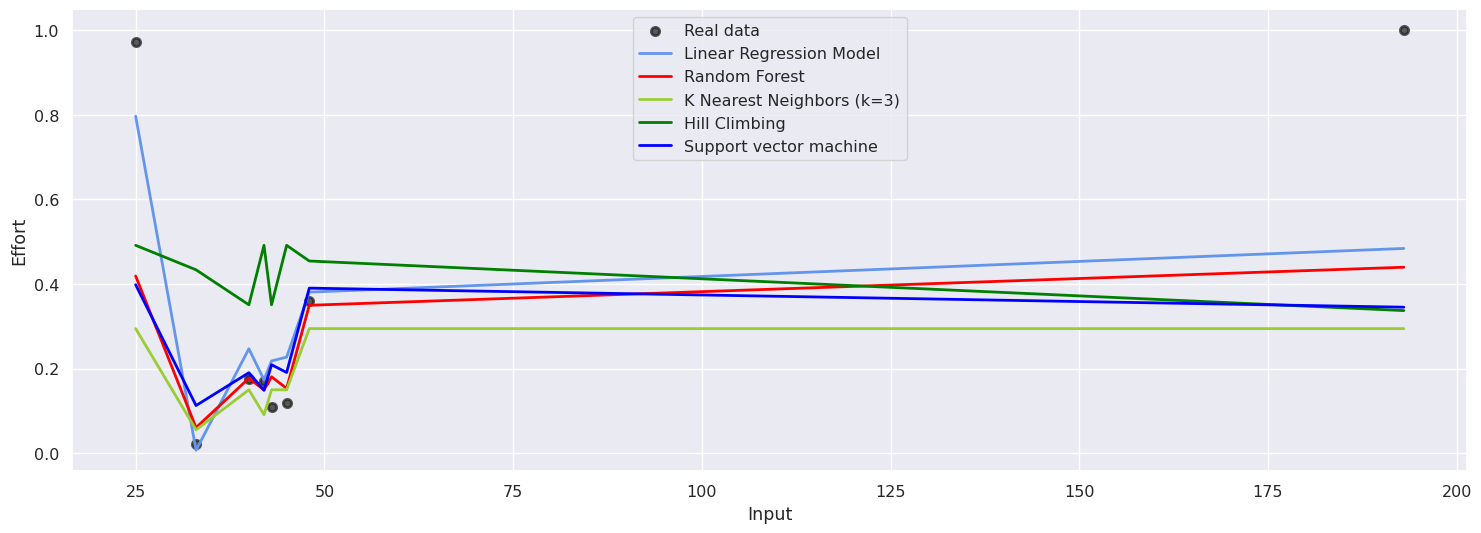

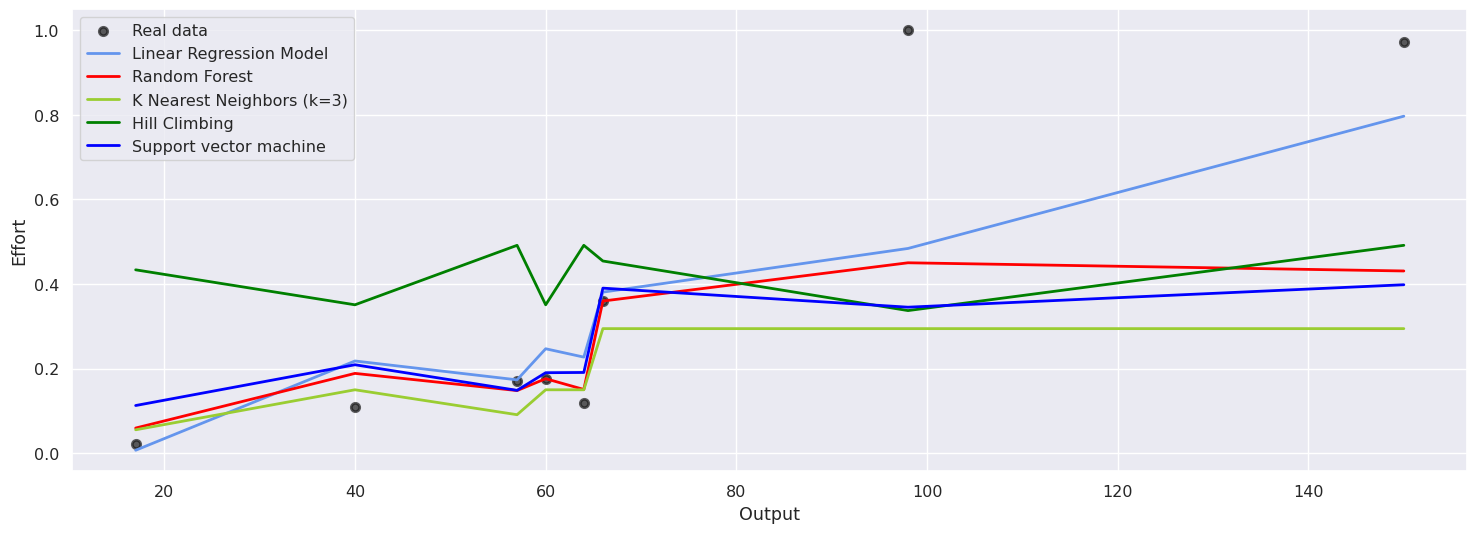

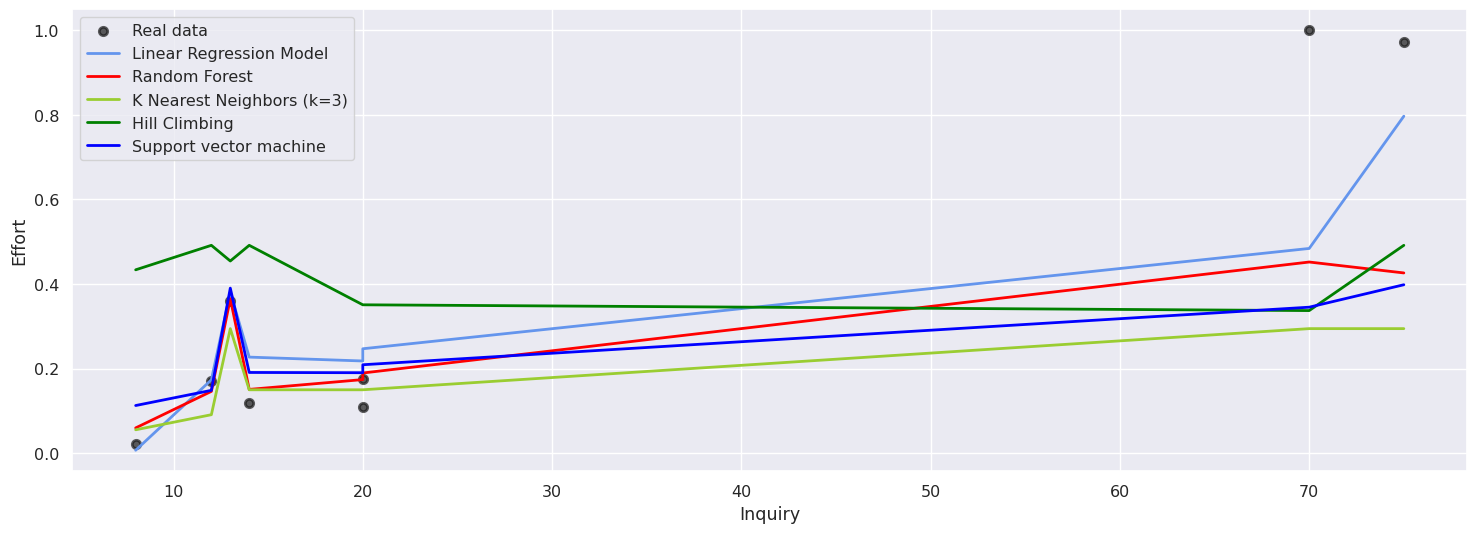

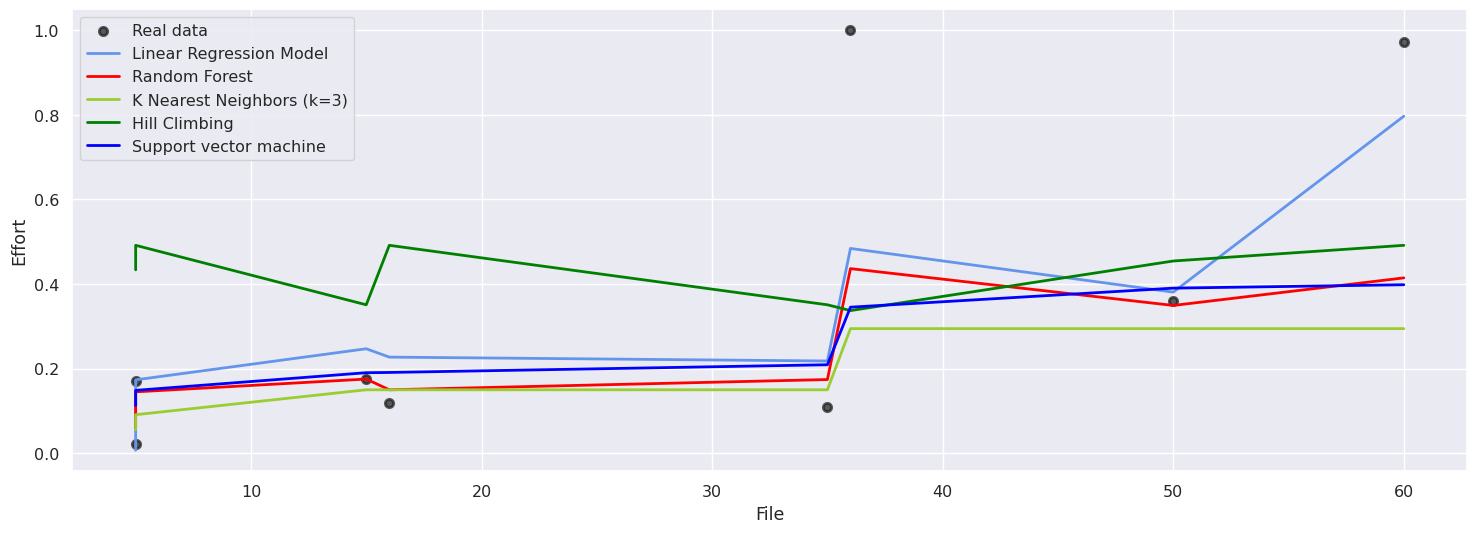

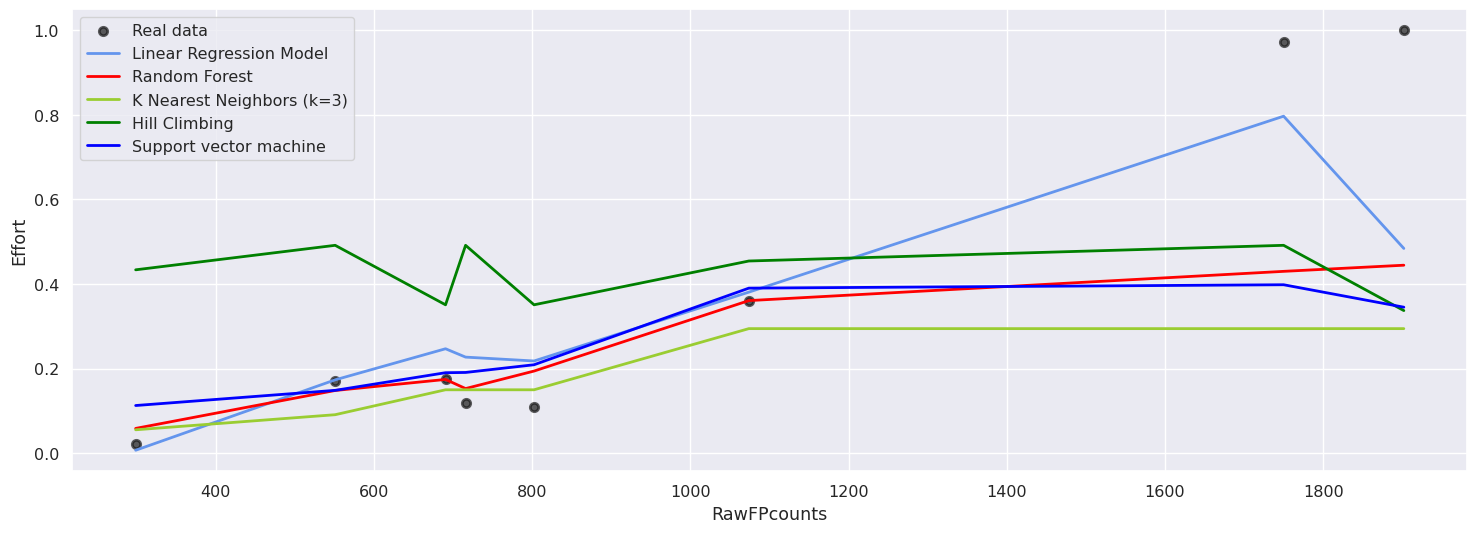

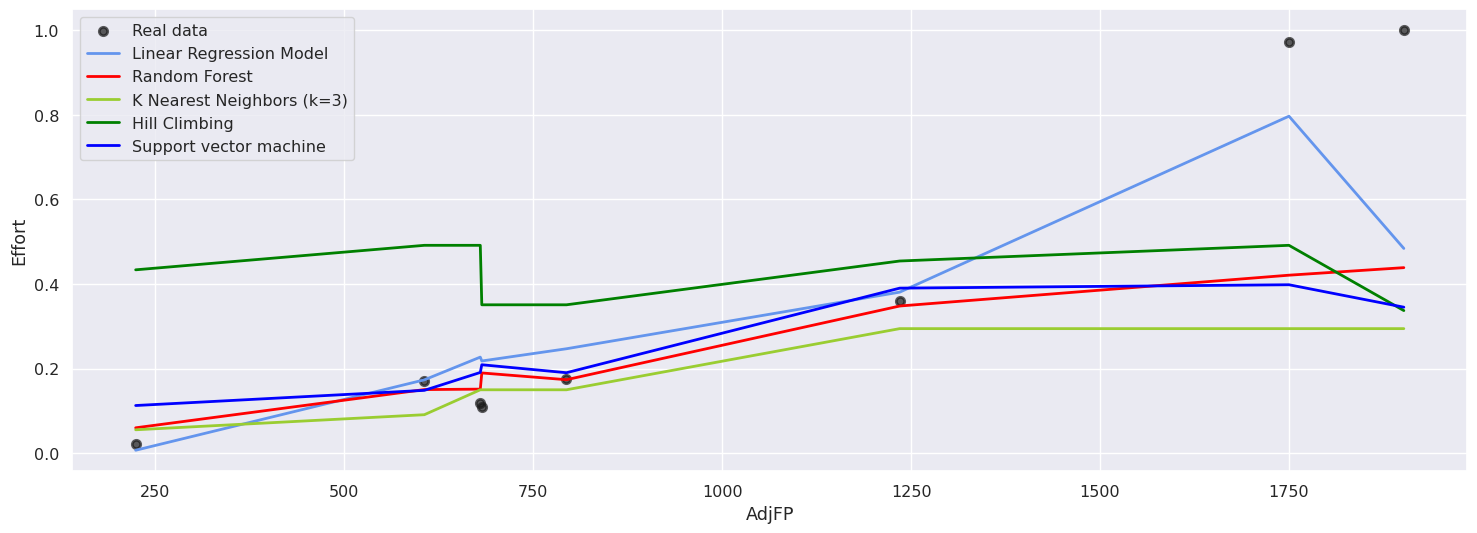

In [ ]:
for i, features in enumerate(X):
    plt.figure(figsize=(18,6))

    # Knn Regression Model
    xs, ys = zip(*sorted(zip(X_test[features], neigh.fit(X_train, y_train).predict(X_test))))

    # Linear Regression Model
    model1_xs, model1_ys = zip(*sorted(zip(X_test[features], regressor.fit(X_train, y_train).predict(X_test))))

    # Random forest
    model2_xs, model2_ys = zip(*sorted(zip(X_test[features], regressor1.fit(X_train, y_train).predict(X_test))))

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[features], LinearSVC.fit(X_train, y_train).predict(X_test))))

    # Hill Climbing
    model3_xs, model3_ys = zip(*sorted(zip(X_test[features], scores)))

    plt.scatter(X_test[features], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model1_xs, model1_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(model2_xs, model2_ys , lw=2, label='Random Forest', c='Red')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(model3_xs, model3_ys , lw=2,label='Hill Climbing', c='Green')
    plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support vector machine', c='Blue')

    plt.xlabel(features)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()